Gianna Pahoundis, Tiffany Loza, Karla Gonzalez, Emily Rodriguez, Alanna Appel


# CS 115 — Group Homework (2–3 hours): Word Toolkit & Mini-Game (Ch 7.1–7.7)
**Sonoma State University — Intro to Python**  
**Topics:** Loops & Strings • Reading Files • Updating Variables • Looping & Counting • `in` Operator • Linear Search • Doctest

### What you'll build (as a team)
A **Word Toolkit** that searches a dictionary (`words.txt`) and powers a small **word game** (like a Spelling Bee variant). You'll write clean, tested functions, run doctests, and include a quick analysis chart.

### Team workflow (suggested)
- Roles: **Driver** (types), **Navigator** (reviews), **QA** (tests & doctests), **Analyst** (charts/summary). Rotate roles each section.
- Timebox: ~30–40 min per major section. Keep moving; leave stretch goals for the end.
- Deliverable: this completed notebook (ipynb), with all doctests/ asserts passing, and your mini-game demo cell working.


---
## 🔧 Setup
Run this cell to download **`words.txt`** (official crossword word list used in *Think Python*).


In [23]:
# @title Download words.txt (run me first)
import os, urllib.request

WORDS_URL = "https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt"
TARGET = "words.txt"

def fetch_words(url=WORDS_URL, target=TARGET):
    if os.path.exists(target):
        print(f"{target} already exists, skipping download.")
        return
    try:
        print(f"Downloading {target} from {url} ...")
        urllib.request.urlretrieve(url, target)
        print("Download complete.")
    except Exception as e:
        print("Could not download words.txt. Error:", e)
        print("If you're offline, place a local copy of words.txt next to this notebook and rerun.")

fetch_words()
assert os.path.exists(TARGET), "words.txt is missing — please ensure it exists, then rerun."
print("words.txt is available ✅")


words.txt already exists, skipping download.
words.txt is available ✅


---
## Part 1 — Core Utilities (≈35–45 min)
Write clean, documented functions with **doctests**. All functions should be **case-insensitive** (use `.lower()` where needed).


In [24]:
from doctest import run_docstring_examples

def run_doctests(func):
    """Run doctests in `func`'s docstring (silent on success)."""
    return run_docstring_examples(func, globals(), name=func.__name__)


In [25]:
# 1.a: has_e(word) — True if word contains 'e' (case-insensitive). Add doctests.
def has_e(word):
    """Return True if `word` contains 'e' (case-insensitive).
    >>> has_e('Emma')
    True
    >>> has_e('Gadsby')
    False
    >>> has_e('TREE')
    True
    >>> has_e('myth')
    False
    """
    return 'e' in word.lower()

run_doctests(has_e)
print("has_e doctests ✅")


has_e doctests ✅


In [26]:
# 1.b: uses_any(word, letters) — True if any char from `letters` occurs in `word`. Add doctests.
def uses_any(word, letters):
    """Return True if any character from `letters` appears in `word` (case-insensitive).
    >>> uses_any('banana', 'aeiou')
    True
    >>> uses_any('apple', 'xyz')
    False
    >>> uses_any('Banana', 'AEIOU')
    True
    """
    for ch in word.lower():
        if ch in letters.lower():
            return True
    return False

run_doctests(uses_any)
print("uses_any doctests ✅")


uses_any doctests ✅


In [27]:
#1.c: uses_only(word, letters) — True if every char in word is in letters. Add doctests.
def uses_only(word, letters):
    """Return True if every character in `word` is drawn from `letters` (case-insensitive).
    >>> uses_only('cab', 'abc')
    True
    >>> uses_only('cabin', 'abc')
    False
    """
    w = word.lower()
    L = letters.lower()
    for ch in w:
        if ch not in L:
            return False
    return True

run_doctests(uses_only)
print("uses_only doctests ✅")


uses_only doctests ✅


In [28]:
# 1.d: avoids(word, letters) — True if word contains none of the letters. Add doctests.
def avoids(word, letters):
    """Return True if `word` contains none of the characters in `letters` (case-insensitive).
    >>> avoids('hello', 'xyz')
    True
    >>> avoids('hello', 'ox')
    False
    """
    w = word.lower()
    L = letters.lower()
    for ch in w:
        if ch in L:
            return False
    return True

run_doctests(avoids)
print("avoids doctests ✅")


avoids doctests ✅


In [29]:
# 1.e: uses_all(word, letters) — True if word includes every letter at least once. Add doctests.
def uses_all(word, letters):
    """Return True if `word` includes every character in `letters` at least once (case-insensitive).
    >>> uses_all('laser', 'aelrs')
    True
    >>> uses_all('laser', 'aelrst')
    False
    """
    w = word.lower()
    for need in letters.lower():
        if need not in w:
            return False
    return True

run_doctests(uses_all)
print("uses_all doctests ✅")


uses_all doctests ✅


In [30]:
# 1.f: Bonus helpers — is_isogram(word) & is_abecedarian(word). Add doctests for each.
def is_isogram(word):
    """Return True if `word` has no repeated letters (case-insensitive).
    >>> is_isogram('dermatoglyphics')
    True
    >>> is_isogram('banana')
    False
    """
    w = word.lower()
    seen = set()
    for ch in w:
        if ch in seen:
            return False
        seen.add(ch)
    return True

def is_abecedarian(word):
    """Return True if letters in `word` are in nondecreasing alphabetical order (case-insensitive).
    >>> is_abecedarian('abbot')
    True
    >>> is_abecedarian('zebra')
    False
    """
    w = word.lower()
    return all(w[i] <= w[i+1] for i in range(len(w)-1))

run_doctests(is_isogram)
run_doctests(is_abecedarian)
print("is_isogram & is_abecedarian doctests ✅")


is_isogram & is_abecedarian doctests ✅


---
## Part 2 — Dictionary Loading & Quick Metrics (≈20–30 min)
Load the word list and compute some quick counts and percentages.


In [31]:
# 2.a: Load all words into a list `WORDS`.
WORDS = [] # makes empty list storing words
with open("words.txt") as fin:
    for line in fin: # reads each line in words.txt file
        WORDS.append(line.strip()) #adds word to list and removes spaces

print("Loaded", len(WORDS), "words.") #prints string, word count, and another string
assert len(WORDS) > 100_000 #checks list has more than 100,000 words


Loaded 113783 words.


In [32]:
# 2.b: Count how many words contain 'e' and compute the percentage.
total = len(WORDS)
with_e = sum(1 for w in WORDS if has_e(w))
pct_with_e = with_e / total * 100
print(f"with 'e': {with_e} / {total} = {pct_with_e:.2f}%")

# sanity band
assert 50 <= pct_with_e <= 80


with 'e': 76162 / 113783 = 66.94%


In [33]:
# 2.c: Using your helpers, compute:
# - words_without_e
# - words_avoiding_xyz
# - longest_no_e (string) and its length
words_without_e = [w for w in WORDS if not has_e(w)]
words_avoiding_xyz = [w for w in WORDS if avoids(w, "xyz")]

# longest word avoiding 'e'
longest_no_e = max((w for w in WORDS if avoids(w, "e")), key=len)
print("words_without_e:", len(words_without_e))
print("words_avoiding_xyz:", len(words_avoiding_xyz))
print("longest_no_e:", longest_no_e, "(len", len(longest_no_e), ")")


words_without_e: 37621
words_avoiding_xyz: 95170
longest_no_e: microminiaturizations (len 21 )


---
## Part 3 — Tiny Visualization (≈10–15 min)
Compute letter frequencies across `WORDS` and plot the **top 10** letters in a single bar chart.


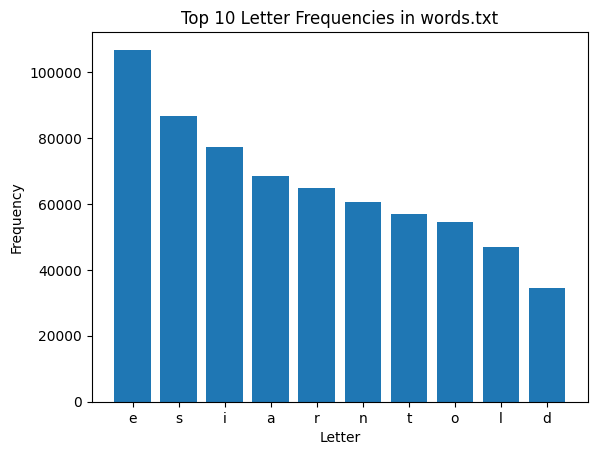

In [34]:
from collections import Counter
letters = Counter()
for w in WORDS:
    for ch in w.lower():
        if 'a' <= ch <= 'z':
            letters[ch] += 1

import matplotlib.pyplot as plt

top10 = letters.most_common(10)
xs = [x for x,_ in top10]
ys = [y for _,y in top10]

plt.figure()
plt.bar(xs, ys)
plt.title("Top 10 Letter Frequencies in words.txt")
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.show()


---
## Part 4 — Build Your **Word Toolkit** (≈25–35 min)
Create a small API (a set of functions) to support interactive word queries.


In [35]:
# 4.a: filter_words(min_len=4, must_include=None, only=None, avoid=None, require_all=None)
def filter_words(words, min_len=1, must_include=None, only=None, avoid=None, require_all=None):
    """Filter `words` by constraints.
    - min_len: minimum length
    - must_include: a character that must appear
    - only: string of allowed letters (word must use only these)
    - avoid: string of forbidden letters
    - require_all: string of letters that all must appear at least once
    """
    out = []
    for w in words:
        wl = w.lower()
        if len(wl) < min_len:
            continue
        if must_include and must_include.lower() not in wl:
            continue
        if only and not uses_only(wl, only):
            continue
        if avoid and not avoids(wl, avoid):
            continue
        if require_all and not uses_all(wl, require_all):
            continue
        out.append(w)
    return sorted(out)


# quick smoke checks
sample = ["laser","alert","trees","realm","zzz","apple","ban","baa"]
assert filter_words(sample, min_len=4) == ["alert","apple","laser","realm","trees"] #took out "zzz" because not meet minimum length of 4
assert "laser" in filter_words(sample, only="aelrst")
assert "alert" in filter_words(sample, only="aelrst", must_include="a")
print("filter_words basic checks ✅")


filter_words basic checks ✅


In [36]:
#4.b: Interactive-ish demo (enter parameters and preview results).
try:
    hive = input("Allowed letters (e.g., aelrst): ").strip() or "aelrst"
    center = input("Center/must-include letter (e.g., a): ").strip() or "a"
    min_len = int(input("Minimum length (>=4 recommended): ").strip() or "4")
except Exception:
    hive, center, min_len = "aelrst", "a", 4

results = filter_words(WORDS, min_len=min_len, must_include=center, only=hive)
print(f"Found {len(results)} matches. Sample: {results[:20]}")


Allowed letters (e.g., aelrst): thecat
Center/must-include letter (e.g., a): theomeole
Minimum length (>=4 recommended): thereme
Found 411 matches. Sample: ['aals', 'aerate', 'aerates', 'alae', 'alar', 'alas', 'alate', 'alee', 'alert', 'alerter', 'alertest', 'alerts', 'ales', 'allele', 'alleles', 'alls', 'altar', 'altars', 'alter', 'alterer']


---
## Part 5 — Mini-Game: Spelling Bee Variant (≈30–40 min)
Rules (simplified):
- A 7-letter **hive** with one **center** letter required in every word.
- Words must be **length ≥ 4** and use only hive letters.
- Scoring: 4-letter words = **1** point; longer words = **length**; **pangram** (uses all hive letters) adds **+7**.
Implement a solver, compute total score, list pangrams, and show the **top 10** scoring words.


In [37]:
def is_valid_spelling_bee_word(word, center, hive, min_len=4): # defines function and checks word meets Spelling Bee requirements
    """Return True if the word meets Spelling Bee requirements.
    A valid word:
    - Is at least `min_len` characters long.
    - Contains the `center` letter.
    - Uses only letters from the `hive`.
    >>> is_valid_spelling_bee_word("tale", "a", "aelrst")
    True
    >>> is_valid_spelling_bee_word("star", "a", "aelrst")
    True
    >>> is_valid_spelling_bee_word("rest", "a", "aelrst")
    False
    """
    w = word.lower() #makes word lowercase
    return (
        len(w) >= min_len and #checks if word is at least minimum length
        center.lower() in w and #checks if word has a center letter
        uses_only(w, hive) #checks is word only uses letters in hive
    )

def spelling_bee_score(word, hive, center): #defines function to calculate score of Spelling Bee
    """ Compute the Spelling Bee score for a given word.

    Rules:
    - 4-letter words earn 1 point.
    - Longer words earn points equal to their length.
    - Words that use all letters from `hive` earn +7 bonus points.

    >>> spelling_bee_score("tale", "aelrst", "a")
    1
    >>> spelling_bee_score("alerts", "aelrst", "a")
    6
    >>> spelling_bee_score("staler", "aelrst", "a")  # uses all hive letters
    13"""
    w = word.lower() # makes word lowercase
    base = 1 if len(w) == 4 else len(w) # Adds 1 point for word letter; else word length
    bonus = 7 if uses_all(w, hive) else 0 #recieves 7 points if word uses all letters from hive; else no points
    return base + bonus # total score counts base points and bonus points

run_doctests(is_valid_spelling_bee_word)
run_doctests(spelling_bee_score)
print("is_valid_spelling_bee_word & spelling_bee_score doctests ✅")

**********************************************************************
File "__main__", line 31, in spelling_bee_score
Failed example:
    spelling_bee_score("alerts", "aelrst", "a")
Expected:
    6
Got:
    13
is_valid_spelling_bee_word & spelling_bee_score doctests ✅


In [38]:
#  5.a: Implement solve_spelling_bee(hive, center) returning a sorted list of valid words.
def solve_spelling_bee(hive, center, words=WORDS): #defines function to find all valid words
    """
    Return a sorted list of valid Spelling Bee words.

    A valid word:
    - Contains the center letter
    - Uses only letters from the hive
    - Is at least 4 letters long

    >>> solve_spelling_bee("aelrst", "a", ["tale", "seal", "tree", "last", "rat", "stale"])
    ['last', 'seal', 'stale', 'tale']
    """
    results = [] #creates empty list to store valid words
    for w in words: #checks each word in list
        if is_valid_spelling_bee_word(w, center, hive): #if word follows Spelling Bee requirements
            results.append(w.lower()) #add lowercase word to results list
    return sorted(set(results)) #sorts words alphabetically and removes duplicates

HIVE = "aelrst" #letters in hive
CENTER = "a" #letter in center that must be in word
solutions = solve_spelling_bee(HIVE, CENTER) # calls function to get all valid words
print(f"Solutions found: {len(solutions)}. Sample:", solutions[:20]) #shows count of solutions and the first 20 words





Solutions found: 411. Sample: ['aals', 'aerate', 'aerates', 'alae', 'alar', 'alas', 'alate', 'alee', 'alert', 'alerter', 'alertest', 'alerts', 'ales', 'allele', 'alleles', 'alls', 'altar', 'altars', 'alter', 'alterer']


In [39]:
# 5.b: Compute total score and pangrams; list top 10 scoring words.
def total_spelling_bee_score(words, hive, center):
    """
    Return total Spelling Bee score and list of pangrams.

    >>> total_spelling_bee_score(["tale", "staler", "stare"], "aelrst", "a")
    (12, ['staler'])
    """
    total = 0
    pangrams = []
    for w in words:
        total += spelling_bee_score(w, hive, center)
        if uses_all(w, hive):
            pangrams.append(w)
    return total, sorted(pangrams)

def top_scoring(words, hive, center, k=10):
    """
    Return top k scoring words as a list of (word, score) tuples.

    >>> top_scoring(["tale", "staler", "stare"], "aelrst", "a", k=2)
    [('staler', 8), ('stare', 5)]
    """
    scored = [(w, spelling_bee_score(w, hive, center)) for w in words]
    scored.sort(key=lambda t: (-t[1], t[0]))
    return scored[:k]

total_score, pangrams = total_spelling_bee_score(solutions, HIVE, CENTER)
print("Total score:", total_score)
print("Pangrams:", pangrams)
for w, sc in top_scoring(solutions, HIVE, CENTER):
    print(f"{w:>10}  {sc}")


Total score: 2562
Pangrams: ['alertest', 'alerts', 'alterers', 'alters', 'artels', 'artless', 'elaters', 'estral', 'laster', 'lasters', 'laterals', 'ratels', 'rattlers', 'rattles', 'realest', 'realters', 'relaters', 'relates', 'salter', 'salters', 'slater', 'slaters', 'staler', 'starless', 'starlet', 'starlets', 'startle', 'startler', 'startlers', 'startles', 'stealer', 'stealers', 'stelar', 'stellar', 'talers', 'tartlets', 'tattlers', 'tearless', 'teaseler', 'teaselers', 'terrellas']
 startlers  16
 teaselers  16
 terrellas  16
  alertest  15
  alterers  15
  laterals  15
  rattlers  15
  realters  15
  relaters  15
  starless  15


---
## Part 6 — Team Reflection (≤10 min)
Briefly describe:
- Who did what (Driver / Navigator / QA / Analyst).
- What you found tricky and how you solved it.
- One improvement you’d make with more time.


Alanna (Navigator) ran through the programs and made sure they all ran. I found the filter words portion tricky because at first I did not understand how it would sort out the list.

Gianna (QA) I created some of the doctests and ran through everything to test it out and make sure it worked. Something that still catches me up in indentation, and normally when i get errors thease days its becuase my indentation isnt consitant, so I have to just take a few extra seconds to look at everything and make sure the indentation lines up and doesn't look funny.

---
## ✅ What to Submit
- This **notebook (.ipynb)** with all cells executed top-to-bottom, doctests passing, and your mini-game demo.
- Keep your names at the top of the notebook.

## 🧮 Grading Rubric (100 pts)
- **Core functions w/ doctests** (`has_e`, `uses_any`, `uses_only`, `avoids`, `uses_all`) — *30 pts*
  - Correctness & edge cases (20), docstrings + doctests (10)
- **Dictionary metrics** (counts/percentages + longest no-'e') — *10 pts*
- **Visualization** (top-10 letter frequency bar chart) — *10 pts*
- **Word Toolkit API** (`filter_words` + demo) — *20 pts*
- **Mini-Game (solver, scoring, pangrams, top-10)** — *20 pts*
- **Team reflection** — *10 pts*
- **Bonus** up to +5 pts for `is_isogram`, `is_abecedarian`, or creative extensions (clearly marked).

*Notebook generated: 2025-09-15 05:10 *
